In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [107]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import math
import seaborn as sns; 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report

In [172]:
df_weapon = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/logfile 1.csv", delimiter=',')
df_weapon.head(10)

,Timestamp,Level,LoggerName,Message,Data
0,12-11-2023 15:42,266,WARNING,app,1 | 0 | 0 | No Coordinate data
1,12-11-2023 15:42,268,WARNING,app,1 | 0 | 0 | No Coordinate data
2,12-11-2023 15:42,461,WARNING,app,1 | 0 | 0 | No Coordinate data
3,12-11-2023 15:42,3,WARNING,app,1 | 0 | 0 | No Coordinate data
4,12-11-2023 15:43,58,WARNING,app,1 | 0 | 0 | No Coordinate data
5,12-11-2023 15:43,91,WARNING,app,1 | 0 | 0 | No Coordinate data
6,12-11-2023 15:43,123,WARNING,app,1 | 0 | 0 | No Coordinate data
7,12-11-2023 15:43,52,WARNING,app,0 | 3 | 2 | Please wait sometime before reloa...
8,12-11-2023 15:43,22,WARNING,app,0 | 3 | 2 | Please wait sometime before reloa...
9,12-11-2023 15:43,156,WARNING,app,1 | 0 | 0 | No Coordinate data


In [173]:
df_weapon.columns

Index(['Timestamp', 'Level', 'LoggerName', 'Message', 'Data'], dtype='object')

In [174]:
df_weapon[['Weapon Range Status', 'Weapons Status', 'Status', 'Msg']] = df_weapon['Data'].str.split('|', expand=True)

In [175]:
df_weapon.head()

,Timestamp,Level,LoggerName,Message,Data,Weapon Range Status,Weapons Status,Status,Msg
0,12-11-2023 15:42,266,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
1,12-11-2023 15:42,268,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
2,12-11-2023 15:42,461,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
3,12-11-2023 15:42,3,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
4,12-11-2023 15:43,58,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data


In [176]:
df_weapon = pd.get_dummies(df_weapon, columns=['Msg'], prefix=['msg'], dtype=int)

In [178]:
df_weapon.head()

,Timestamp,Level,LoggerName,Message,Data,Weapon Range Status,Weapons Status,Status,msg_ In Range,msg_ Missile Missed,msg_ Missile Reloaded successfully,msg_ Missile armed successfully,msg_ Missile fired successfully,msg_ Missile is not Loaded,msg_ Missile unarmed successfully,msg_ No Coordinate data,msg_ No More Rounds Remaining,msg_ Out of Range,msg_ Please wait sometime before reloading
0,12-11-2023 15:42,266,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12-11-2023 15:42,268,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12-11-2023 15:42,461,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,12-11-2023 15:42,3,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,12-11-2023 15:43,58,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [179]:
# columns_to_select_weapon = ['Level', 'Weapon Range Status', 'Weapons Status', 'Status']
df_weapon_new = df_weapon.drop(columns=['Timestamp', 'LoggerName', 'Message', 'Data'])

In [180]:
df_weapon_new.head(10)

,Level,Weapon Range Status,Weapons Status,Status,msg_ In Range,msg_ Missile Missed,msg_ Missile Reloaded successfully,msg_ Missile armed successfully,msg_ Missile fired successfully,msg_ Missile is not Loaded,msg_ Missile unarmed successfully,msg_ No Coordinate data,msg_ No More Rounds Remaining,msg_ Out of Range,msg_ Please wait sometime before reloading
0,266,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,268,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,461,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,91,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,123,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,52,0,3,2,0,0,0,0,0,0,0,0,0,0,1
8,22,0,3,2,0,0,0,0,0,0,0,0,0,0,1
9,156,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [181]:
df_weapon_new = df_weapon_new[df_weapon_new['Level'] != 'Level']

In [182]:
df_weapon_new[df_weapon_new.isna().any(axis=1)].isna().sum(axis=1)

Series([], dtype: int64)

In [183]:
df_scada_good = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/ship_power_randomized_data_constant_speed.csv", delimiter=',')
df_scada_good.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts)
0,15,1024.681725,0.035009,1004.940348,6.083512e+07
1,15,1025.047390,0.034992,1004.648764,6.080872e+07
2,15,1025.085363,0.034986,1004.614887,6.079992e+07
3,15,1024.775867,0.035013,1005.331773,6.087118e+07
4,15,1024.675182,0.034996,1005.270724,6.083186e+07


In [184]:
df_scada_good['Stat'] = 1

In [185]:
df_scada_good = df_scada_good.drop(columns = ['Density of Seawater (kg/m^3)', 'Speed (m/s)', 'Drag Coefficient', 'Wetted Surface Area (m^2)'])

In [186]:
df_scada_good.columns

Index(['Power Required (Watts)', 'Stat'], dtype='object')

In [187]:
df_scada_bad = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/ship_power_randomized_data_variable_speed_40.csv", delimiter=',')
df_scada_bad.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts)
0,9.137496,1025.001992,0.035012,1005.164477,1.376045e+07
1,14.873070,1024.962505,0.035011,1004.890365,5.931992e+07
2,17.134647,1024.612871,0.035009,1005.345407,9.070977e+07
3,12.223697,1024.659058,0.035007,1005.053599,3.292352e+07
4,11.690948,1025.297478,0.035008,1005.463028,2.883380e+07


In [188]:
df_scada_bad['Stat'] = 3

In [189]:
df_scada_bad = df_scada_bad.drop(columns = ['Density of Seawater (kg/m^3)', 'Speed (m/s)', 'Drag Coefficient', 'Wetted Surface Area (m^2)'])

In [190]:
df_scada_bad.columns

Index(['Power Required (Watts)', 'Stat'], dtype='object')

In [191]:
df_scada_combined = pd.concat([df_scada_good, df_scada_bad], ignore_index=True)

In [192]:
df_scada_combined.head()

,Power Required (Watts),Stat
0,6.083512e+07,1
1,6.080872e+07,1
2,6.079992e+07,1
3,6.087118e+07,1
4,6.083186e+07,1


In [193]:
df_scada_combined.tail()

,Power Required (Watts),Stat
1995,1.442877e+07,3
1996,1.622622e+08,3
1997,1.485152e+08,3
1998,1.565964e+08,3
1999,1.911938e+07,3


In [194]:
df_new = pd.merge(df_scada_combined.assign(key=1), df_weapon_new.assign(key=1), on='key').drop('key', axis=1)

In [195]:
df_new.head()

,Power Required (Watts),Stat,Level,Weapon Range Status,Weapons Status,Status,msg_ In Range,msg_ Missile Missed,msg_ Missile Reloaded successfully,msg_ Missile armed successfully,msg_ Missile fired successfully,msg_ Missile is not Loaded,msg_ Missile unarmed successfully,msg_ No Coordinate data,msg_ No More Rounds Remaining,msg_ Out of Range,msg_ Please wait sometime before reloading
0,6.083512e+07,1,266,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6.083512e+07,1,268,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6.083512e+07,1,461,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,6.083512e+07,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6.083512e+07,1,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [196]:
df_new.shape

(25226000, 17)

In [197]:
# df_new.to_csv('C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/df_new.csv', index=False)

In [198]:
# df_new[df_new.isna().any(axis=1)].isna().sum(axis=1)

In [199]:
# df_new.iloc[987]

In [200]:
# df_new = df_new[df_new['Level'] != 'Level']

In [201]:
df_new[df_new.isna().any(axis=1)].isna().sum(axis=1)

Series([], dtype: int64)

In [202]:
df_new['Status'] = df_new['Status'].astype(int)
df_new['Status'].dtype

dtype('int32')

In [203]:
df_new['Stat'].dtype

dtype('int64')

In [204]:
# df_new['Label'] = df_new['Status'].apply(lambda x: 1 if x in [2] else 0)
df_new['label'] = df_new.apply(lambda row: 1 if row['Stat'] == 1 and row['Status'] == 0 else 2 if row['Stat'] == 1 and row['Status'] in [1,2] else 3, axis=1)
# df_new['Label'] = 1
# df_new.loc[(df_new['Status'] == 0) | (df_new['Status'] == 1), 'Label'] = 0

In [205]:
df_new.head()

,Power Required (Watts),Stat,Level,Weapon Range Status,Weapons Status,Status,msg_ In Range,msg_ Missile Missed,msg_ Missile Reloaded successfully,msg_ Missile armed successfully,msg_ Missile fired successfully,msg_ Missile is not Loaded,msg_ Missile unarmed successfully,msg_ No Coordinate data,msg_ No More Rounds Remaining,msg_ Out of Range,msg_ Please wait sometime before reloading,label
0,6.083512e+07,1,266,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,6.083512e+07,1,268,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,6.083512e+07,1,461,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6.083512e+07,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,6.083512e+07,1,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [206]:
# df_new.tail()
(df_new['label'] == 1).sum()

589000

In [207]:
(df_new['label'] == 2).sum()

12024000

In [208]:
(df_new['label'] == 3).sum()

12613000

In [209]:
y = df_new['label']

In [210]:
df_new = df_new.drop(columns=['label', 'Stat', 'Status'])

In [211]:
df_new.columns

Index(['Power Required (Watts)', 'Level', 'Weapon Range Status',
       'Weapons Status', 'msg_ In Range', 'msg_ Missile Missed',
       'msg_ Missile Reloaded successfully', 'msg_ Missile armed successfully',
       'msg_ Missile fired successfully', 'msg_ Missile is not Loaded',
       'msg_ Missile unarmed successfully', 'msg_ No Coordinate data',
       'msg_ No More Rounds Remaining', 'msg_ Out of Range',
       'msg_ Please wait sometime before reloading'],
      dtype='object')

In [212]:
y

0           1
1           1
2           1
3           1
4           1
           ..
25225995    3
25225996    3
25225997    3
25225998    3
25225999    3
Name: label, Length: 25226000, dtype: int64

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import roc_auc_score
# Assuming you have a target variable 'y' for regression

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model's performance
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [214]:
y_pred_series = pd.Series(y_pred)

counts = y_pred_series.value_counts()
print(counts)

3    2519369
2    2407884
1     117947
Name: count, dtype: int64


In [215]:
y_test_series = pd.Series(y_test)

counts = y_test_series.value_counts()
print(counts)

label
3    2524194
2    2403209
1     117797
Name: count, dtype: int64


In [216]:
comparison_df = pd.DataFrame({'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred})

In [217]:
comparison_df.head(20)

,Actual (y_test),Predicted (y_pred)
25006547,3,3
4572869,2,2
10282946,2,2
7711772,2,2
18709253,3,3
13026309,3,3
17551693,3,3
5252228,1,1
20712906,3,3
2244945,2,2


In [218]:
comparison_df.columns

Index(['Actual (y_test)', 'Predicted (y_pred)'], dtype='object')

In [219]:
# roc_auc_score(comparison_df['Actual (y_test)'], comparison_df['Predicted (y_pred)'])

In [220]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix_percent = matrix / matrix.sum(axis=1)[:, None] * 100

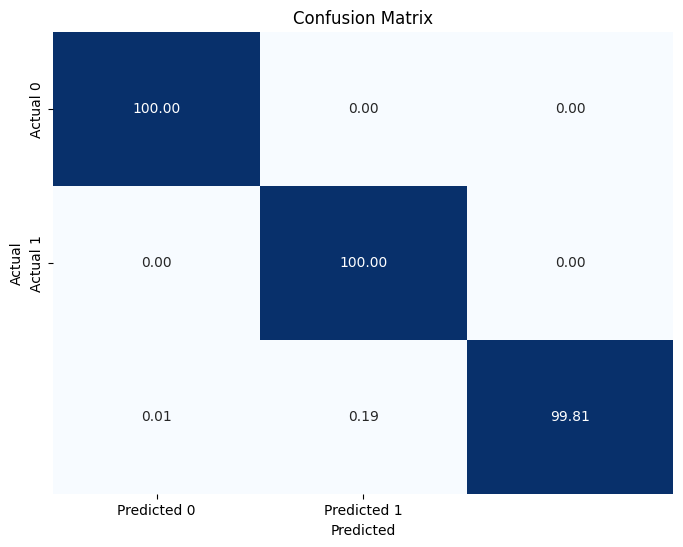

In [221]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [230]:
TP = matrix_percent.diagonal()
FP = matrix_percent.sum(axis=0) - TP
FN = matrix_percent.sum(axis=1) - TP
TN = matrix_percent.sum() - (TP + FP + FN)

for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]:.2f}, FP: {FP[i]:.2f}, TN: {TN[i]:.2f}, FN: {FN[i]:.2f}")

Class 0 - TP: 100.00, FP: 0.01, TN: 199.99, FN: 0.00
Class 1 - TP: 100.00, FP: 0.19, TN: 199.81, FN: 0.00
Class 2 - TP: 99.81, FP: 0.00, TN: 200.00, FN: 0.19


In [231]:
from sklearn.tree import export_text
from sklearn import tree

In [232]:
tree_rules = export_text(regressor, feature_names=list(X_train.columns))
print(tree_rules)

|--- Power Required (Watts) <= 60738874.00
|   |--- class: 3
|--- Power Required (Watts) >  60738874.00
|   |--- Power Required (Watts) <= 61085540.00
|   |   |--- msg_ Out of Range <= 0.50
|   |   |   |--- msg_ Missile Missed <= 0.50
|   |   |   |   |--- msg_ No Coordinate data <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- msg_ No Coordinate data >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- msg_ Missile Missed >  0.50
|   |   |   |   |--- Power Required (Watts) <= 60828970.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Power Required (Watts) >  60828970.00
|   |   |   |   |   |--- class: 1
|   |   |--- msg_ Out of Range >  0.50
|   |   |   |--- Power Required (Watts) <= 60828970.00
|   |   |   |   |--- Power Required (Watts) <= 60828862.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Power Required (Watts) >  60828862.00
|   |   |   |   |   |--- class: 3
|   |   |   |--- Power Required (Watts) >  60828970.00
|   |   |   |   |--- clas

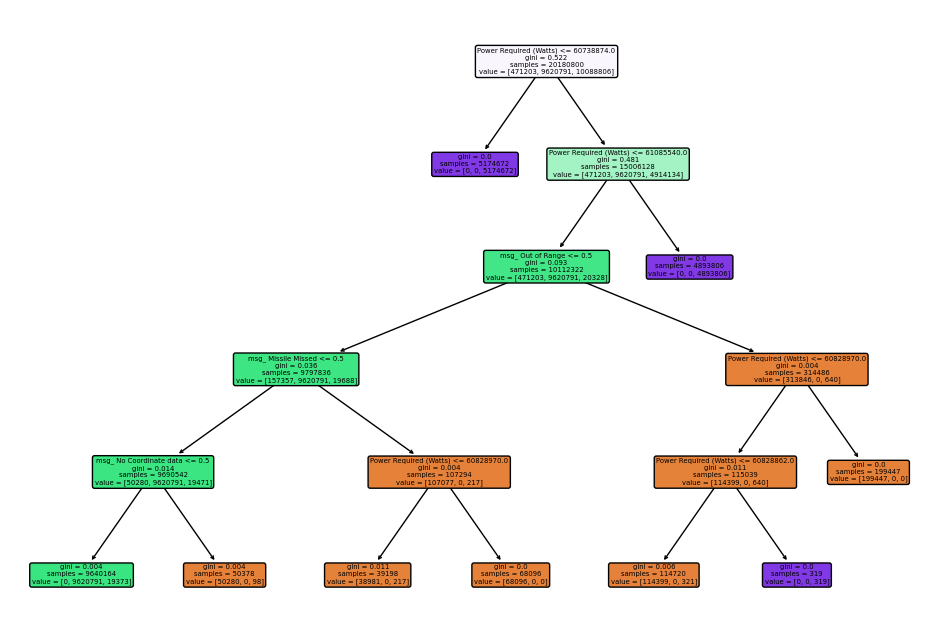

In [233]:
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, feature_names=list(X_train.columns), filled=True, rounded=True)
plt.show()